In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [62]:
# Carregar os dados

base_dados = pd.read_excel('magalu.xlsx')

In [63]:
base_dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [64]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [65]:
base_dados.isnull().sum()

Data          0
Maior         0
Menor         0
Abertura      0
Fechamento    0
Volume        0
Adj Close     0
dtype: int64

In [66]:
#Series temporais
dados= base_dados.set_index('Data')
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


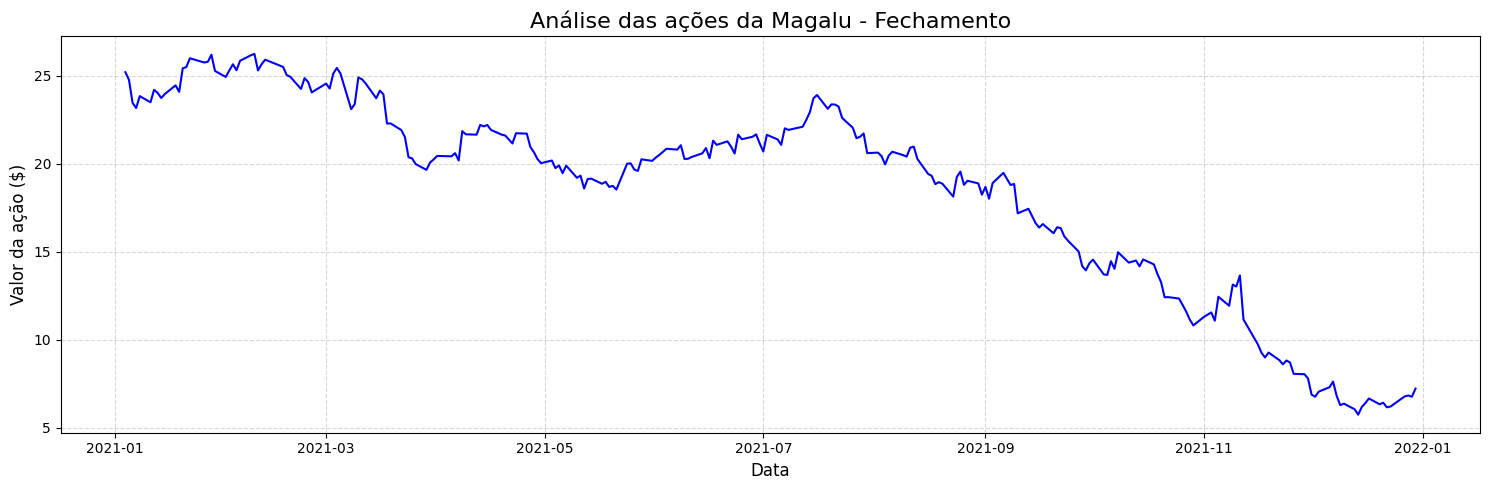

In [67]:
#analise das açoes da Magalu - Fechamento 
plt.figure(figsize=(15, 5))
sns.lineplot(data=dados, x=dados.index, y='Fechamento', color='blue')
plt.title('Análise das ações da Magalu - Fechamento', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor da ação ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

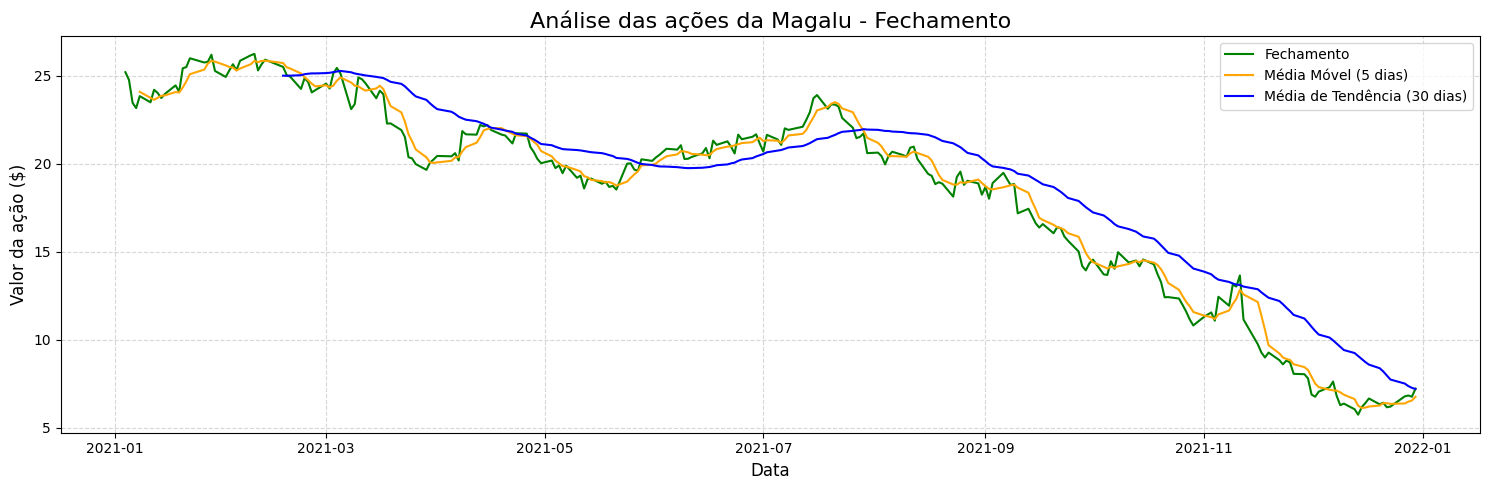

In [68]:
#comparativo de fechamento entre fechamento , media movel e media de tendencia
media_movel = dados['Fechamento'].rolling(window=5).mean()
media_tendencia = dados['Fechamento'].rolling(window=30).mean() 

plt.figure(figsize=(15, 5))
sns.lineplot(data=dados, x=dados.index, y='Fechamento', color='green', label='Fechamento')
sns.lineplot(data=media_movel, color='orange', label='Média Móvel (5 dias)')
sns.lineplot(data=media_tendencia,color='blue', label='Média de Tendência (30 dias)')
plt.title('Análise das ações da Magalu - Fechamento', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor da ação ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

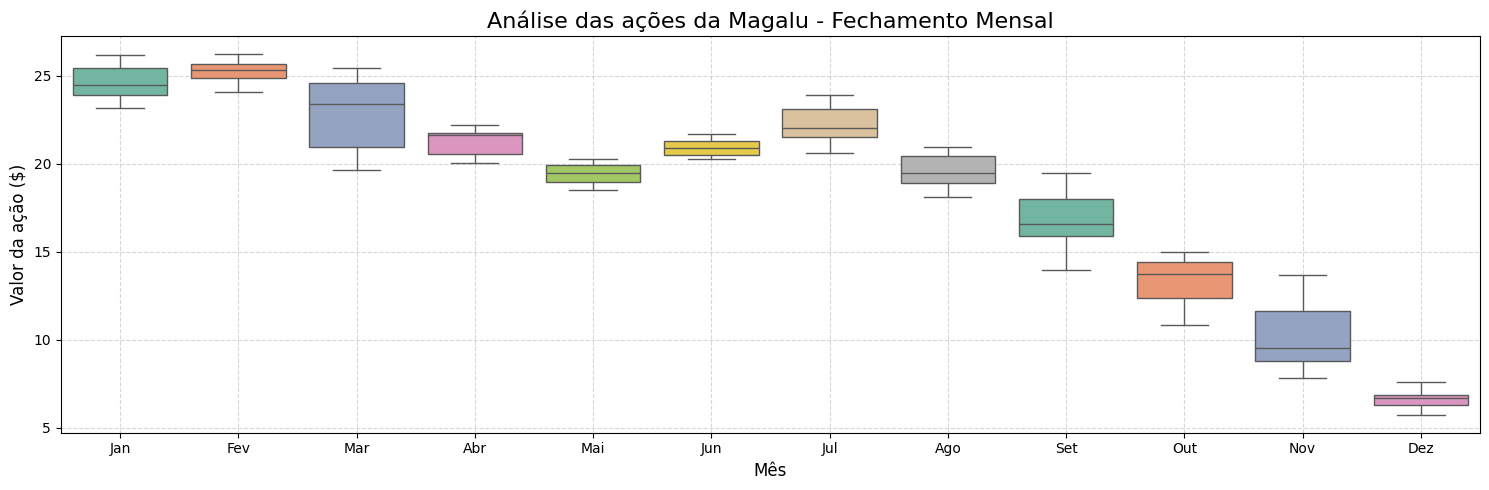

In [69]:
#boxplot mensal
base_dados['Mes'] = base_dados['Data'].dt.month
plt.figure(figsize=(15, 5))
sns.boxplot(data=base_dados, x='Mes', y='Fechamento', palette='Set2')
plt.title('Análise das ações da Magalu - Fechamento Mensal', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Valor da ação ($)', fontsize=12)
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

In [70]:
# analise de fechamento mensal
base_dados.groupby(['Mes']).describe()['Fechamento']

,count,mean,min,25%,50%,75%,max,std
Mes,,,,,,,,
1,19.0,24.644737,23.160000,23.900000,24.450001,25.455000,26.190001,0.960280
2,18.0,25.208889,24.049999,24.877501,25.299999,25.650000,26.240000,0.656021
3,23.0,22.855217,19.650000,20.940001,23.389999,24.559999,25.440001,1.976698
4,20.0,21.249000,20.030001,20.560000,21.625000,21.760000,22.200001,0.735297
5,21.0,19.430476,18.530001,18.969999,19.459999,19.900000,20.250000,0.564973
6,21.0,20.898095,20.270000,20.500000,20.889999,21.270000,21.670000,0.463116
7,21.0,22.232857,20.600000,21.530001,22.040001,23.120001,23.900000,0.977574
8,22.0,19.656818,18.129999,18.897500,19.485000,20.452499,20.969999,0.885827
9,21.0,16.746191,13.940000,15.870000,16.570000,18.010000,19.480000,1.628581


In [71]:

#verificar comportamento diario da ação


grafico = go.Figure(
    data=[
        go.Candlestick(
            x=base_dados['Data'],
            open=base_dados['Abertura'],
            high=base_dados['Maior'],
            low=base_dados['Menor'],
            close=base_dados['Fechamento'],
            name='Candlestick'
        )
    ]
)
grafico.update_layout( xaxis_rangeslider_visible=False,)
grafico.show()

In [72]:
## Análise de Correlação: Volume vs Variação de Preço

base_dados['Variacao_Precos'] = base_dados['Fechamento'].pct_change()
correlacao = base_dados[['Volume', 'Variacao_Precos']].corr()
print('Correlação entre Volume e Variação de Preço:')
print(correlacao)


Correlação entre Volume e Variação de Preço:
                   Volume  Variacao_Precos
Volume           1.000000        -0.158752
Variacao_Precos -0.158752         1.000000
